## Import Datasets

In [1]:
import pandas as pd
from sklearn.utils import shuffle
titanic=pd.read_csv('titanic.csv')
titanic=titanic.dropna(axis=0) #clean for NaNs
citrus=pd.read_csv('citrus.csv')

### Modify Data

In [2]:
citrus=shuffle(citrus, random_state=1)
citrus=citrus[0:2700] #this will be our medium-sized dataset
citrus=citrus.replace(to_replace='grapefruit', value=1) #encode oranges/grapefruits as 0/1 
citrus=citrus.replace(to_replace='orange', value=0)
citrus=citrus[['diameter','weight',  'red',  'green',  'blue','name']] #ensures aligned label columns
citrus.loc[citrus.name == 'grapefruit'].count() #to make sure n of each of the labels are balanced
print(titanic.shape,citrus.shape)
titanic.head(),citrus.head()

(1307, 28) (2700, 6)


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
 0            1  22.0   7.2500    0      1     0       0       0       0   
 1            2  38.0  71.2833    1      1     0       0       0       0   
 2            3  26.0   7.9250    1      0     0       0       0       0   
 3            4  35.0  53.1000    1      1     0       0       0       0   
 4            5  35.0   8.0500    0      0     0       0       0       0   
 
    zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
 0       0  ...        0        0        0       3        0        0       2.0   
 1       0  ...        0        0        0       1        0        0       0.0   
 2       0  ...        0        0        0       3        0        0       2.0   
 3       0  ...        0        0        0       1        0        0       2.0   
 4       0  ...        0        0        0       3        0        0       2.0   
 
    zero.17  zero.18  2urvived  
 0        0    

## Initializations

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
## initialize models
logreg=LogisticRegression(class_weight='balanced',solver='saga',max_iter=5000)
linsvm=LinearSVC(class_weight='balanced')
neigh = KNeighborsClassifier(n_neighbors=3)


##lists to loop over 
trials=[1,2,3]
splits=[0.8,0.5,0.2]
datasets=[titanic,citrus]




### Logistic Regression

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

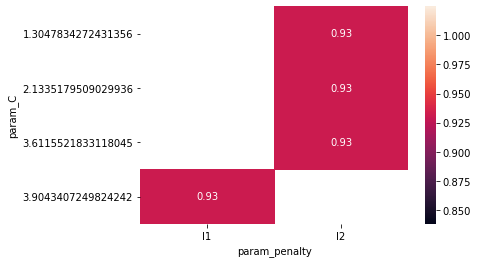

In [4]:
logreg_grid=dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
test_scores=[]
valid_scores=[]
train_scores=[]
for data in datasets:
    for split in splits: 
        for trial in trials:
        
            train, test= train_test_split(data,test_size=split,random_state=trial)
            train_vect= train.iloc[:,:-1]
            train_labels=train.iloc[:,-1]
            test_vect= test.iloc[:,:-1]
            test_labels=test.iloc[:,-1]
            
            trainMod=logreg.fit(train_vect,train_labels) #train logreg without cv
            TrainScore=trainMod.score(train_vect,train_labels)
            train_scores.append(TrainScore)
            RndSrch = RandomizedSearchCV(logreg, logreg_grid, n_iter=4, cv=5,n_jobs=6) #cross-validate
            tuned=RndSrch.fit(train_vect,train_labels)
            valid_scores.append(max(tuned.cv_results_['mean_test_score']))
            BestParams =tuned.best_params_
            TrainTuned=logreg.set_params(**BestParams)  #train logreg using tuned parameters from cv(with 60)
            TrainTuned.fit(train_vect,train_labels)
            pred_labels=TrainTuned.predict(test_vect)  #test logreg using tuned parameters 
            test_scores.append(accuracy_score(test_labels,pred_labels))

LogRegpvt = pd.pivot_table(pd.DataFrame(RndSrch.cv_results_),
                     values='mean_test_score', index='param_C', columns='param_penalty')
LogRegHM = sns.heatmap(LogRegpvt,annot=True)

In [6]:
from statistics import mean

titanicTrAvgs=[mean(train_scores[0:3]),mean(train_scores[3:6]),mean(train_scores[6:9])]
titanicValAvgs=[mean(valid_scores[0:3]),mean(valid_scores[3:6]),mean(valid_scores[6:9])]
titanicTeAvgs=[mean(test_scores[0:3]),mean(test_scores[3:6]),mean(test_scores[6:9])]
citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusValAvgs=citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusTeAvgs=[mean(test_scores[9:12]),mean(test_scores[12:15]),mean(test_scores[15:18])]
LogRegTitAvgs=pd.DataFrame(list(zip(titanicTrAvgs,titanicValAvgs,titanicTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])
LogRegCitAvgs=pd.DataFrame(list(zip(citrusTrAvgs,citrusValAvgs,citrusTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])

print(LogRegTitAvgs)
print(LogRegCitAvgs)
TrAvgs=[mean(train_scores[0:9]),mean(train_scores[10:18])]
ValAvgs=[mean(valid_scores[0:9]),mean(valid_scores[10:18])]
TestAvgs=[mean(test_scores[0:9]),mean(test_scores[10:18])]

LogRegDataAvgs=pd.DataFrame(list(zip(TrAvgs,ValAvgs,TestAvgs)),index=['Titanic','Citrus'],columns=['Train','Validation','Test'])
print(LogRegDataAvgs)

     Training  Validation      Test
.8   0.708812    0.703556  0.678458
0.5  0.709546    0.697369  0.699286
0.2  0.719936    0.712281  0.703562
     Training  Validation      Test
.8   0.935185    0.935185  0.922068
0.5  0.931358    0.931358  0.924198
0.2  0.929630    0.929630  0.927160
            Train  Validation      Test
Titanic  0.712765    0.704402  0.693769
Citrus   0.930509    0.928900  0.924931


## K-Nearest Neighbors

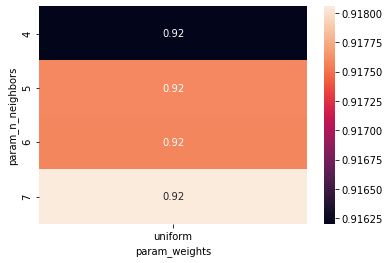

In [7]:
neigh_grid = {'n_neighbors': np.arange(1, 8), 'weights': ['uniform','distance']}
test_scores=[]
valid_scores=[]
train_scores=[]
for data in datasets:
    for split in splits:
        for trial in trials:
         
            train, test= train_test_split(data,test_size=split,random_state=trial)
            train_vect= train.iloc[:,:-1]
            train_labels=train.iloc[:,-1]
            test_vect= test.iloc[:,:-1]
            test_labels=test.iloc[:,-1]
            
            trainMod=neigh.fit(train_vect,train_labels) #train neigh without cv
            TrainScore=trainMod.score(train_vect,train_labels)
            train_scores.append(TrainScore)
            RndSrch = RandomizedSearchCV(neigh, neigh_grid, n_iter=4, cv=5,n_jobs=6) #cross-validate
            tuned=RndSrch.fit(train_vect,train_labels)
            valid_scores.append(max(tuned.cv_results_['mean_test_score']))
            BestParams =tuned.best_params_
            TrainTuned=neigh.set_params(**BestParams)  #train neigh using tuned parameters from cv(with 60)
            TrainTuned.fit(train_vect,train_labels)
            pred_labels=TrainTuned.predict(test_vect)  #test neigh using tuned parameters 
            test_scores.append(accuracy_score(test_labels,pred_labels))
neighpvt = pd.pivot_table(pd.DataFrame(RndSrch.cv_results_),
                     values='mean_test_score', index='param_n_neighbors', columns='param_weights')
neighHM = sns.heatmap(neighpvt,annot=True)


     Training  Validation      Test
.8   0.835249    0.740905  0.737094
0.5  0.821848    0.740200  0.755861
0.2  0.893780    0.750558  0.777354
     Training  Validation      Test
.8   0.964198    0.964198  0.907716
0.5  0.980988    0.980988  0.909630
0.2  1.000000    1.000000  0.912346
            Train  Validation      Test
Titanic  0.850292    0.743888  0.756770
Citrus   0.986157    0.914317  0.910845


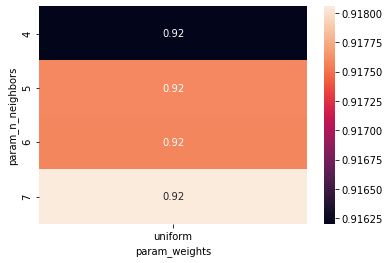

In [8]:
neighpvt = pd.pivot_table(pd.DataFrame(RndSrch.cv_results_),
                     values='mean_test_score', index='param_n_neighbors', columns='param_weights')
neighHM = sns.heatmap(neighpvt,annot=True)

titanicTrAvgs=[mean(train_scores[0:3]),mean(train_scores[3:6]),mean(train_scores[6:9])]
titanicValAvgs=[mean(valid_scores[0:3]),mean(valid_scores[3:6]),mean(valid_scores[6:9])]
titanicTeAvgs=[mean(test_scores[0:3]),mean(test_scores[3:6]),mean(test_scores[6:9])]
citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusValAvgs=citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusTeAvgs=[mean(test_scores[9:12]),mean(test_scores[12:15]),mean(test_scores[15:18])]

KNNTitAvgs=pd.DataFrame(list(zip(titanicTrAvgs,titanicValAvgs,titanicTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])
KNNCitAvgs=pd.DataFrame(list(zip(citrusTrAvgs,citrusValAvgs,citrusTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])
print(KNNTitAvgs)
print(KNNCitAvgs)
## 2 datasets, 3 partitions, 3 trials is 18 scores per type of score
#scores 0-9: SpComments, scores 10-18: LSA

TrAvgs=[mean(train_scores[0:9]),mean(train_scores[10:18])]
ValAvgs=[mean(valid_scores[0:9]),mean(valid_scores[10:18])]
TestAvgs=[mean(test_scores[0:9]),mean(test_scores[10:18])]

neighAvgs=pd.DataFrame(list(zip(TrAvgs,ValAvgs,TestAvgs)),index=['Titanic','Citrus'],columns=['Train','Validation','Test'])
print(neighAvgs)

## Support Vector Machine

In [9]:
linsvm_grid=dict(C=[.01,0.5,1,4,10]) 
test_scores=[]
valid_scores=[]
train_scores=[]
for data in datasets: 
    for split in splits:
        for trial in trials:
        
            train, test= train_test_split(data,test_size=split,random_state=trial)
            train_vect= train.iloc[:,:-1]
            train_labels=train.iloc[:,-1]
            test_vect= test.iloc[:,:-1]
            test_labels=test.iloc[:,-1]
            
            trainMod=linsvm.fit(train_vect,train_labels) #train linsvm without cv
            TrainScore=trainMod.score(train_vect,train_labels)
            train_scores.append(TrainScore)
            RndSrch = RandomizedSearchCV(linsvm, linsvm_grid, n_iter=4, cv=5,n_jobs=6) #cross-validate
            tuned=RndSrch.fit(train_vect,train_labels)
            valid_scores.append(max(tuned.cv_results_['mean_test_score']))
            BestParams =tuned.best_params_
            TrainTuned=linsvm.set_params(**BestParams)  #train linsvm using tuned parameters from cv(with 60)
            TrainTuned.fit(train_vect,train_labels)
            pred_labels=TrainTuned.predict(test_vect)  #test linsvm using tuned parameters 
            test_scores.append(accuracy_score(test_labels,pred_labels))



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

     Training  Validation      Test
.8   0.756066    0.738123  0.746654
0.5  0.670240    0.677037  0.771662
0.2  0.740670    0.746093  0.762087
     Training  Validation      Test
.8   0.929012    0.929012  0.918519
0.5  0.826173    0.826173  0.921235
0.2  0.926389    0.926389  0.920988
            Train  Validation      Test
Titanic  0.722325    0.720417  0.760134
Citrus   0.887535    0.916331  0.920405


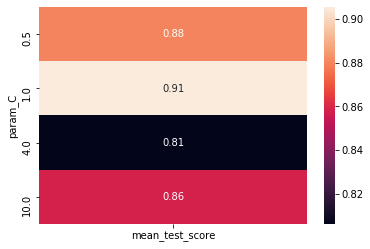

In [10]:
linsvmpvt = pd.pivot_table(pd.DataFrame(RndSrch.cv_results_),
                     values='mean_test_score', index='param_C')
linsvmHM = sns.heatmap(linsvmpvt,annot=True)

titanicTrAvgs=[mean(train_scores[0:3]),mean(train_scores[3:6]),mean(train_scores[6:9])]
titanicValAvgs=[mean(valid_scores[0:3]),mean(valid_scores[3:6]),mean(valid_scores[6:9])]
titanicTeAvgs=[mean(test_scores[0:3]),mean(test_scores[3:6]),mean(test_scores[6:9])]
citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusValAvgs=citrusTrAvgs=[mean(train_scores[9:12]),mean(train_scores[12:15]),mean(train_scores[15:18])]
citrusTeAvgs=[mean(test_scores[9:12]),mean(test_scores[12:15]),mean(test_scores[15:18])]
SVMTitAvgs=pd.DataFrame(list(zip(titanicTrAvgs,titanicValAvgs,titanicTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])
SVMCitAvgs=pd.DataFrame(list(zip(citrusTrAvgs,citrusValAvgs,citrusTeAvgs)),index=['.8','0.5','0.2'],columns=['Training','Validation'
                                                                                                      ,'Test'])
print(SVMTitAvgs)
print(SVMCitAvgs)
## 2 datasets, 3 partitions, 3 trials is 18 scores per type of score
#scores 0-9: SpComments, scores 10-18: LSA

TrAvgs=[mean(train_scores[0:9]),mean(train_scores[10:18])]
ValAvgs=[mean(valid_scores[0:9]),mean(valid_scores[10:18])]
TestAvgs=[mean(test_scores[0:9]),mean(test_scores[10:18])]

linsvmAvgs=pd.DataFrame(list(zip(TrAvgs,ValAvgs,TestAvgs)),index=['Titanic','Citrus'],columns=['Train','Validation','Test'])
print(linsvmAvgs)

In [12]:
TitanicAvgs=pd.DataFrame([LogRegDataAvgs.loc['Titanic'],neighAvgs.loc['Titanic'],linsvmAvgs.loc['Titanic']],index=['LogReg','KNN','SVM'])
CitrusAvgs=pd.DataFrame([LogRegDataAvgs.loc['Citrus'],neighAvgs.loc['Citrus'],linsvmAvgs.loc['Citrus']],index=['LogReg-Citrus','KNN-Citrus','SVM-Citrus'])
print('Best model for Titanic train dataset is',list(TitanicAvgs.index[TitanicAvgs.Train==max(TitanicAvgs.Train)]))
print('Best model for Titanic validation dataset is',list(TitanicAvgs.index[TitanicAvgs.Validation==max(TitanicAvgs.Validation)]))
print('Best model for Titanic test dataset is',list(TitanicAvgs.index[TitanicAvgs.Test==max(TitanicAvgs.Test)]))
print('Best model for Citrus train dataset is',list(CitrusAvgs.index[CitrusAvgs.Train==max(CitrusAvgs.Train)]))
print('Best model for Citrus validation dataset is',list(CitrusAvgs.index[CitrusAvgs.Validation==max(CitrusAvgs.Validation)]))
print('Best model for Citrus test dataset is',list(CitrusAvgs.index[CitrusAvgs.Test==max(CitrusAvgs.Test)]))

Best model for Titanic train dataset is ['KNN']
Best model for Titanic validation dataset is ['KNN']
Best model for Titanic test dataset is ['SVM']
Best model for Citrus train dataset is ['KNN-Citrus']
Best model for Citrus validation dataset is ['LogReg-Citrus']
Best model for Citrus test dataset is ['LogReg-Citrus']


In [13]:
TitanicAvgs

,Train,Validation,Test
LogReg,0.712765,0.704402,0.693769
KNN,0.850292,0.743888,0.756770
SVM,0.722325,0.720417,0.760134


In [14]:
CitrusAvgs

,Train,Validation,Test
LogReg-Citrus,0.930509,0.928900,0.924931
KNN-Citrus,0.986157,0.914317,0.910845
SVM-Citrus,0.887535,0.916331,0.920405
